In [1]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

### Moving Average Convergence Divergence (MACD)

In [3]:
ticker = "MSFT"
df = yf.download(ticker,dt.date.today()-dt.timedelta(365),dt.datetime.today())

def MACD(DF,a,b,c):
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean()
    df["MA_Slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    return df

[*********************100%***********************]  1 of 1 completed


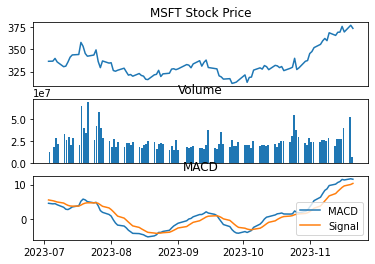

Text(0.5, 0.98, 'Stock Price with MACD')

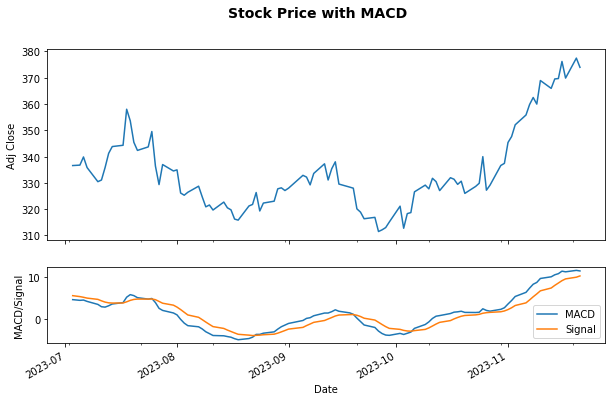

In [4]:
# Visualization - plotting MACD/signal along with close price and volume for last 100 data points
output = MACD(df, 12, 26, 9)

plt.subplot(311)
plt.plot(output.iloc[-100:,4])
plt.title(f"{ticker} Stock Price")
plt.xticks([])

plt.subplot(312)
plt.bar(output.iloc[-100:,5].index, df.iloc[-100:,5].values)
plt.title('Volume')
plt.xticks([])

plt.subplot(313)
plt.plot(output.iloc[-100:,[-2,-1]])
plt.title('MACD')
plt.legend(('MACD','Signal'),loc='lower right')

plt.show()


# Visualization - Using object orient approach
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, sharey=False, figsize=(10, 6), gridspec_kw = {'height_ratios':[2.5, 1]})
output.iloc[-100:,4].plot(ax=ax0)
ax0.set(ylabel='Adj Close')

output.iloc[-100:,[-2,-1]].plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='MACD/Signal')

# Title the figure
fig.suptitle('Stock Price with MACD', fontsize=14, fontweight='bold')